### Descripcion del proyecto
Una empresa automotriz tiene planes de ingresar a nuevos mercados con sus productos actuales (P1, P2, P3, P4 y P5). Despues de una investigacion de mercado exhaustiva, han concluido que el comportamiento del nuevo mercado es similar al de su mercado actual.

En su mercado actual, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron campanas de comunicacion y acercamiento personalizadas para cada uno de estos segmentos. Esta estrategia ha funcionado **excepcionalmente bien** para ellos. Ahora planean usar la misma estrategia en los nuevos mercados y han identificado a **2627 nuevos clientes potenciales.**

# 1. Cargar Datos
Se comienza ubicando la ruta de los archivos de los datos para posteriormente cargarlos en una variable usando pandas.

In [1]:
import pandas as pd

# Cargar los datos de entrenamiento y prueba
train_df = pd.read_csv('data/Train.csv')
test_df = pd.read_csv('data/Test.csv')

# Mostrar las primeras filas para explorar
print('Train:')
display(train_df.head(5))
print('Test:')
display(test_df.head(5))

Train:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


Test:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


# 2. Algoritmo Clustering (k-Means)
En esta sección se realiza el proceso de clustering utilizando el algoritmo K-Means.
El objetivo es agrupar a los clientes en segmentos similares según sus características, permitiendo identificar patrones y perfiles de clientes.

In [2]:
# Algoritmo K-Means con scikit-learn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Ejemplo simple de uso
X_real_demo = train_df[['Age', 'Family_Size']].dropna().sample(12).values # Tomar 12 datos aleatorios de ['Age', 'Family_Size']
X_demo = X_real_demo # Usar datos reales para la demostración

k_demo = 2
kmeans = KMeans(n_clusters=k_demo, random_state=42)
labels_demo = kmeans.fit_predict(X_demo) # fit_predict | ajusta el modelo y asigna etiquetas a c/punto a un cluster
centroides_demo = kmeans.cluster_centers_ # cluster_centers_ | centroides finales de los clusters

print("Datos de entrada:\n", X_demo)
print("Etiquetas asignadas:\n", labels_demo)
print("Centroides:\n", centroides_demo)

Datos de entrada:
 [[31.  4.]
 [31.  1.]
 [41.  2.]
 [83.  3.]
 [40.  4.]
 [29.  3.]
 [40.  5.]
 [19.  4.]
 [31.  4.]
 [25.  1.]
 [42.  5.]
 [21.  4.]]
Etiquetas asignadas:
 [1 1 0 0 0 1 0 1 1 1 0 1]
Centroides:
 [[49.2         3.8       ]
 [26.71428571  3.        ]]


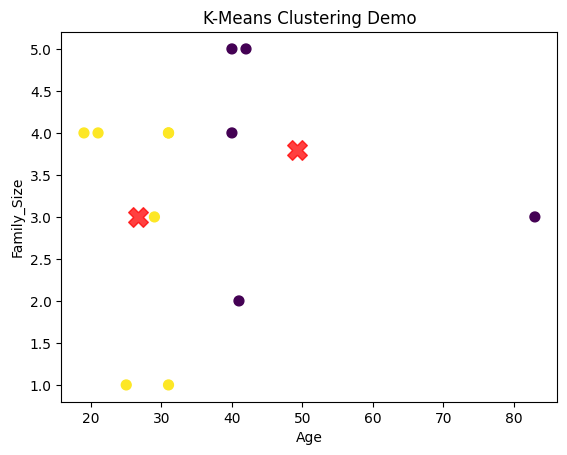

In [3]:
#Visualización de los clusters
plt.scatter(X_demo[:, 0], X_demo[:, 1], c=labels_demo, s=50, cmap='viridis')
plt.scatter(centroides_demo[:, 0], centroides_demo[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Centroides
plt.title('K-Means Clustering Demo')
plt.xlabel('Age')
plt.ylabel('Family_Size')
plt.show()


# 3. Proceso de desarrollo

### a) Ingenieria de caracteristicas (Feature Engineering)
Tecnicas para transformar, limpiar y mejorar los datos segun las necesidades del modelo:

- Codificacion de variables categoricas (OneHotEncoder, LabelEncoder)
- Normalizacion o estandarizacion (StandardScaler, MinMaxScaler) - fundamental para K-Means
- Transformaciones logaritmicas (para variables con colas pesadas)
- Binning (agrupacion de variables continuas como edad)
- Agregaciones (crear nuevas variables, por ejemplo, ingreso por edad)
- Seleccion de caracteristicas (remover ruido y redundancia)

> "Mejores caracteristicas permiten usar modelos menos complejos que se ejecutan mas rapido"

In [4]:
# Antes del Feature Engineering
print('Antes del Feature Engineering:')

# Columnas originales relevantes
cols_originales = ['Gender', 'Profession', 'Spending_Score', 'Age', 'Family_Size', 'Work_Experience']
display(train_df[cols_originales].head(10))

Antes del Feature Engineering:


,Gender,Profession,Spending_Score,Age,Family_Size,Work_Experience
0,Male,Healthcare,Low,22,4.0,1.0
1,Female,Engineer,Average,38,3.0,NaN
2,Female,Engineer,Low,67,1.0,1.0
3,Male,Lawyer,High,67,2.0,0.0
4,Female,Entertainment,High,40,6.0,NaN
5,Male,Artist,Average,56,2.0,0.0
6,Male,Healthcare,Low,32,3.0,1.0
7,Female,Healthcare,Low,33,3.0,1.0
8,Female,Engineer,Low,61,3.0,0.0
9,Female,Artist,Average,55,4.0,1.0


In [5]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

In [6]:
# A1) Codificacion de variables categoricas
# Crear copia del dataframe
train_processed = train_df.copy()

# Rellenar valores nulos antes de transformar
train_processed['Age'] = train_processed['Age'].fillna(train_processed['Age'].median())
train_processed['Family_Size'] = train_processed['Family_Size'].fillna(train_processed['Family_Size'].median())
train_processed['Work_Experience'] = train_processed['Work_Experience'].fillna(0)
train_processed['Spending_Score'] = train_processed['Spending_Score'].fillna('Low')
train_processed['Gender'] = train_processed['Gender'].fillna(train_processed['Gender'].mode()[0])
train_processed['Profession'] = train_processed['Profession'].fillna(train_processed['Profession'].mode()[0])
train_processed['Ever_Married'] = train_processed['Ever_Married'].fillna(train_processed['Ever_Married'].mode()[0])
train_processed['Graduated'] = train_processed['Graduated'].fillna(train_processed['Graduated'].mode()[0])
train_processed['Var_1'] = train_processed['Var_1'].fillna(train_processed['Var_1'].mode()[0])

# Codificar variables categoricas con LabelEncoder
gender_encoder = LabelEncoder()
profession_encoder = LabelEncoder()
spending_encoder = LabelEncoder()
married_encoder = LabelEncoder()
graduated_encoder = LabelEncoder()
var1_encoder = LabelEncoder()

train_processed['Gender_encoded'] = gender_encoder.fit_transform(train_processed['Gender'])
train_processed['Profession_encoded'] = profession_encoder.fit_transform(train_processed['Profession'])
train_processed['Spending_Score_encoded'] = spending_encoder.fit_transform(train_processed['Spending_Score'])
train_processed['Ever_Married_encoded'] = married_encoder.fit_transform(train_processed['Ever_Married'])
train_processed['Graduated_encoded'] = graduated_encoder.fit_transform(train_processed['Graduated'])
train_processed['Var_1_encoded'] = var1_encoder.fit_transform(train_processed['Var_1'])

In [7]:
# A2) Binning - Agrupar edad en categorias
train_processed['Age_bin'] = pd.cut(train_processed['Age'],
                                    bins=[0, 25, 40, 60, 100],
                                    labels=['Joven', 'Adulto', 'Maduro', 'Mayor'])

train_processed['Age_bin'] = train_processed['Age_bin'].fillna('Adulto')
age_bin_encoder = LabelEncoder()
train_processed['Age_bin_encoded'] = age_bin_encoder.fit_transform(train_processed['Age_bin'].astype(str))

In [8]:
# A3) Transformacion logaritmica para Work_Experience
train_processed['Work_Experience_log'] = np.log1p(train_processed['Work_Experience'])

In [9]:
# A4) Agregacion (Creacion de una nueva variable) - gasto por miembro de familia
# Gasto_por_miembro = Spending_Score_encoded / (Family_Size + 1)
train_processed['Gasto_por_miembro'] = train_processed['Spending_Score_encoded'] / (train_processed['Family_Size'] + 1)

In [10]:
# A5) Normalizacion con StandardScaler
# Seleccionar variables numericas para normalizar
num_vars_to_scale = ['Age', 'Family_Size', 'Work_Experience_log', 'Gasto_por_miembro']
scaler = StandardScaler()
train_processed[num_vars_to_scale] = scaler.fit_transform(train_processed[num_vars_to_scale])


formula:

$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

Donde:
- $X$ es el valor original
- $\mu$ es la media de la columna | (sumar todos los valores y dividir por el número de valores)
- $\sigma$ es la desviación estándar de la columna | ( medida de dispersión de los datos respecto a la media)


In [11]:
# A6) Seleccionar caracteristicas finales para el modelo
features_finales = [
    'Gender_encoded',
    'Ever_Married_encoded',
    'Graduated_encoded',
    'Profession_encoded',
    'Spending_Score_encoded',
    'Var_1_encoded',
    'Age',
    'Family_Size',
    'Work_Experience_log',
    'Age_bin_encoded',
    'Gasto_por_miembro'
]

X = train_processed[features_finales].copy()
print('Feature Engineering completado.')
print(f'Dataset final: {X.shape[0]} filas, {X.shape[1]} caracteristicas')

Feature Engineering completado.
Dataset final: 8068 filas, 11 caracteristicas


In [12]:
# Visualizacion
print('Dataset procesado con Feature Engineering:')
print(f'Número de filas: {X.shape[0]}')
print(f'Número de características: {X.shape[1]}')
print('\nPrimeras filas del dataset procesado:')
display(X.head(10))
#print('\nEstadísticas descriptivas:')
#display(X.describe().round(2))

Dataset procesado con Feature Engineering:
Número de filas: 8068
Número de características: 11

Primeras filas del dataset procesado:


,Gender_encoded,Ever_Married_encoded,Graduated_encoded,Profession_encoded,Spending_Score_encoded,Var_1_encoded,Age,Family_Size,Work_Experience_log,Age_bin_encoded,Gasto_por_miembro
0,1,0,0,5,2,3,-1.284623,0.762698,-0.144919,1,-0.081736
1,0,1,1,2,0,3,-0.327151,0.095802,-0.961197,0,-1.254438
2,0,1,1,2,2,5,1.408268,-1.237990,-0.144919,3,1.677316
3,1,1,1,7,1,5,1.408268,-0.571094,-0.961197,3,-0.277186
4,0,1,1,3,1,5,-0.207467,2.096491,-0.961197,0,-0.835616
5,1,1,0,0,0,5,0.750006,-0.571094,-0.961197,2,-1.254438
6,1,0,1,5,2,5,-0.686203,0.095802,-0.144919,0,0.211439
7,0,0,1,5,2,5,-0.626361,0.095802,-0.144919,0,0.211439
8,0,1,1,2,2,6,1.049216,0.095802,-0.961197,3,0.211439
9,0,1,1,0,0,5,0.690164,0.762698,-0.144919,2,-1.254438


In [13]:
# Tablas de equivalencia para variables codificadas
print('=== TABLAS DE EQUIVALENCIA PARA INTERPRETACIÓN ===')
print('\nEstas tablas muestran cómo se codificaron las variables categóricas:\n')

# Gender
print('1. Género (Gender):')
gender_equiv = pd.DataFrame({
    'Código': sorted(train_processed['Gender_encoded'].unique()),
    'Valor Original': [train_processed[train_processed['Gender_encoded'] == i]['Gender'].iloc[0] 
                       for i in sorted(train_processed['Gender_encoded'].unique())]
})
display(gender_equiv)

# Ever_Married
print('\n2. Estado Civil (Ever_Married):')
married_equiv = pd.DataFrame({
    'Código': sorted(train_processed['Ever_Married_encoded'].unique()),
    'Valor Original': [train_processed[train_processed['Ever_Married_encoded'] == i]['Ever_Married'].iloc[0] 
                       for i in sorted(train_processed['Ever_Married_encoded'].unique())]
})
display(married_equiv)

# Graduated
print('\n3. Graduado (Graduated):')
grad_equiv = pd.DataFrame({
    'Código': sorted(train_processed['Graduated_encoded'].unique()),
    'Valor Original': [train_processed[train_processed['Graduated_encoded'] == i]['Graduated'].iloc[0] 
                       for i in sorted(train_processed['Graduated_encoded'].unique())]
})
display(grad_equiv)

# Profession
print('\n4. Profesión (Profession):')
prof_equiv = pd.DataFrame({
    'Código': sorted(train_processed['Profession_encoded'].unique()),
    'Valor Original': [train_processed[train_processed['Profession_encoded'] == i]['Profession'].iloc[0] 
                       for i in sorted(train_processed['Profession_encoded'].unique())]
})
display(prof_equiv)

# Spending_Score
print('\n5. Nivel de Gasto (Spending_Score):')
score_equiv = pd.DataFrame({
    'Código': sorted(train_processed['Spending_Score_encoded'].unique()),
    'Valor Original': [train_processed[train_processed['Spending_Score_encoded'] == i]['Spending_Score'].iloc[0] 
                       for i in sorted(train_processed['Spending_Score_encoded'].unique())]
})
display(score_equiv)

# Var_1
print('\n6. Variable Anonimizada (Var_1):')
var1_equiv = pd.DataFrame({
    'Código': sorted(train_processed['Var_1_encoded'].unique()),
    'Valor Original': [train_processed[train_processed['Var_1_encoded'] == i]['Var_1'].iloc[0] 
                       for i in sorted(train_processed['Var_1_encoded'].unique())]
})
display(var1_equiv)

# Age_bin
print('\n7. Categoría de Edad (Age_bin):')
age_bin_equiv = pd.DataFrame({
    'Código': [0, 1, 2, 3],
    'Valor Original': ['Adulto', 'Joven', 'Maduro', 'Mayor'],
    'Rango de Edad': ['40-60 años', '0-25 años', '25-40 años', '60+ años']
})
display(age_bin_equiv)

=== TABLAS DE EQUIVALENCIA PARA INTERPRETACIÓN ===

Estas tablas muestran cómo se codificaron las variables categóricas:

1. Género (Gender):


,Código,Valor Original
0,0,Female
1,1,Male



2. Estado Civil (Ever_Married):


,Código,Valor Original
0,0,No
1,1,Yes



3. Graduado (Graduated):


,Código,Valor Original
0,0,No
1,1,Yes



4. Profesión (Profession):


,Código,Valor Original
0,0,Artist
1,1,Doctor
2,2,Engineer
3,3,Entertainment
4,4,Executive
5,5,Healthcare
6,6,Homemaker
7,7,Lawyer
8,8,Marketing



5. Nivel de Gasto (Spending_Score):


,Código,Valor Original
0,0,Average
1,1,High
2,2,Low



6. Variable Anonimizada (Var_1):


,Código,Valor Original
0,0,Cat_1
1,1,Cat_2
2,2,Cat_3
3,3,Cat_4
4,4,Cat_5
5,5,Cat_6
6,6,Cat_7



7. Categoría de Edad (Age_bin):


,Código,Valor Original,Rango de Edad
0,0,Adulto,40-60 años
1,1,Joven,0-25 años
2,2,Maduro,25-40 años
3,3,Mayor,60+ años


### b) Clustering con K-Means
- Determinar el número óptimo de clusters usando el Método del Codo con la métrica WCSS (Within-Cluster Sum of Squares)

- Aplicar el algoritmo K-Means:

`from sklearn.cluster import KMeans kmeans = KMeans(n_clusters=optimal_k, random_state=42) clusters = kmeans.fit_predict(X_scaled)`

In [14]:
# Determinar numero optimo de clusters usando Metodo del Codo (WCSS)
print('Buscando numero optimo de clusters...')

wcss = []
K_range = range(2, 11)  # Probar K desde 2 hasta 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)                   # Ajustar el modelo
    wcss.append(kmeans.inertia_)    # inertia_ = WCSS

# Mostrar resultados en una sola tabla
print('Resultados del analisis de clusters:')
for i, k in enumerate(K_range):
    print(f'K={k}: WCSS = {wcss[i]:.2f}')

print('Calculo completado.')

Buscando numero optimo de clusters...
Resultados del analisis de clusters:
K=2: WCSS = 82019.19
K=3: WCSS = 71239.05
K=4: WCSS = 61906.30
K=5: WCSS = 55572.56
K=6: WCSS = 50981.76
K=7: WCSS = 47041.54
K=8: WCSS = 44162.99
K=9: WCSS = 42331.13
K=10: WCSS = 40374.54
Calculo completado.
Resultados del analisis de clusters:
K=2: WCSS = 82019.19
K=3: WCSS = 71239.05
K=4: WCSS = 61906.30
K=5: WCSS = 55572.56
K=6: WCSS = 50981.76
K=7: WCSS = 47041.54
K=8: WCSS = 44162.99
K=9: WCSS = 42331.13
K=10: WCSS = 40374.54
Calculo completado.


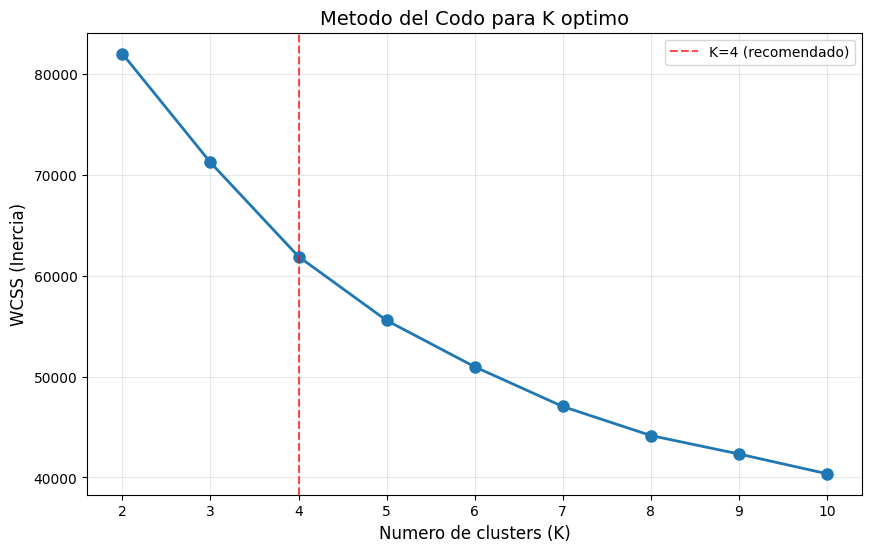

In [15]:
# Grafico del metodo del codo
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o', linewidth=2, markersize=8)
plt.title('Metodo del Codo para K optimo', fontsize=14)
plt.xlabel('Numero de clusters (K)', fontsize=12)
plt.ylabel('WCSS (Inercia)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Marcar K=4 segun el negocio (4 segmentos: A, B, C, D)
plt.axvline(x=4, color='r', linestyle='--', alpha=0.7, label='K=4 (recomendado)')
plt.legend()
plt.show()

In [16]:
# Aplicar K-Means con K=4 clusters
optimal_k = 4
print(f'Aplicando K-Means con K={optimal_k}...')

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X)

# Agregar clusters al DataFrame
X['Cluster'] = clusters
train_processed['Cluster'] = clusters

print(f'Modelo entrenado exitosamente')
print(f'Inercia final: {kmeans_final.inertia_:.2f}')
print(f'Iteraciones: {kmeans_final.n_iter_}')

Aplicando K-Means con K=4...
Modelo entrenado exitosamente
Inercia final: 61906.30
Iteraciones: 16


In [17]:
# Mostrar distribucion de clientes por cluster
cluster_counts = X['Cluster'].value_counts().sort_index()
print('Distribucion de clientes por cluster:')
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(X)) * 100
    print(f'Cluster {cluster_id}: {count} clientes ({percentage:.1f}%)')

print(f'Total: {len(X)} clientes')

Distribucion de clientes por cluster:
Cluster 0: 2483 clientes (30.8%)
Cluster 1: 2506 clientes (31.1%)
Cluster 2: 1001 clientes (12.4%)
Cluster 3: 2078 clientes (25.8%)
Total: 8068 clientes


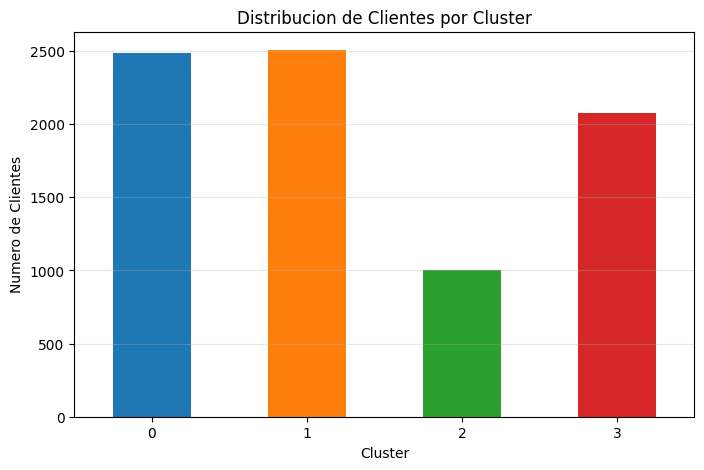

In [18]:
# Grafico de distribucion por clusters
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Distribucion de Clientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Numero de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

### c) Visualizacion de resultados
Graficos para entender los clusters:

- Graficos de dispersion 2D/3D con color por cluster
- Perfiles de cliente por cluster (caracteristicas promedio)

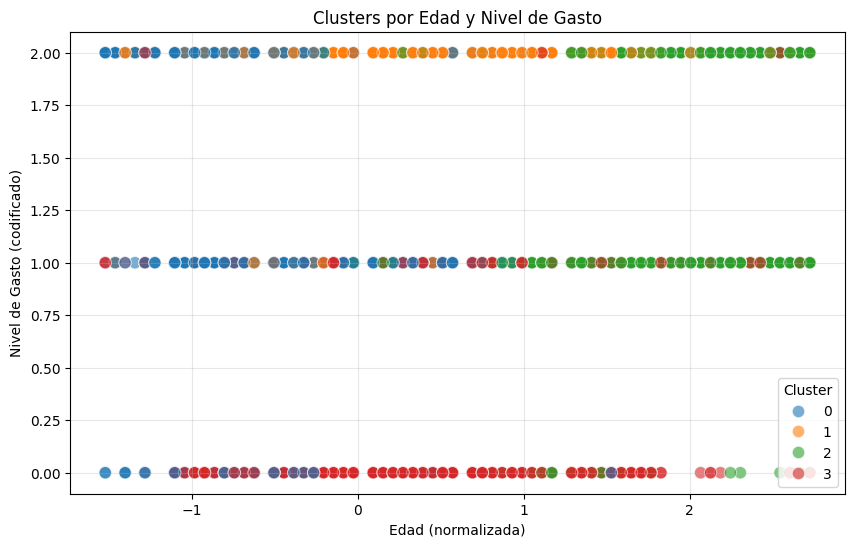

In [19]:
# Visualizacion de clusters en 2D
import seaborn as sns

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Grafico 2D: Edad vs Nivel de Gasto
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Age'], y=X['Spending_Score_encoded'], 
                hue=X['Cluster'], palette=colors, s=80, alpha=0.6)
plt.title('Clusters por Edad y Nivel de Gasto')
plt.xlabel('Edad (normalizada)')
plt.ylabel('Nivel de Gasto (codificado)')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

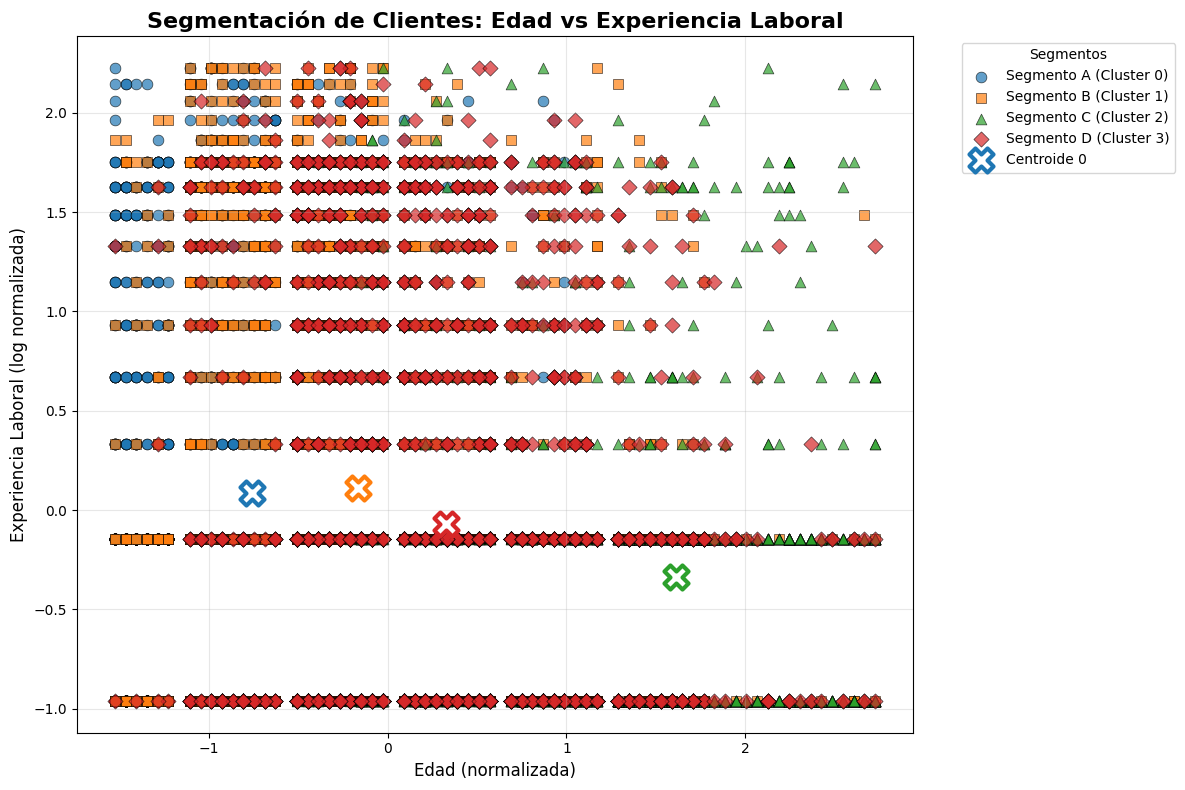

In [20]:
# Gráfico mejorado con mayor dispersión - Edad vs Experiencia Laboral
plt.figure(figsize=(12, 8))

# Usar variables con mayor variabilidad para mejor dispersión
x_var = 'Age'  # Edad normalizada
y_var = 'Work_Experience_log'  # Experiencia laboral (log)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
markers = ['o', 's', '^', 'D']  # Diferentes formas para cada cluster

# Crear scatter plot para cada cluster
for i in range(4):
    cluster_data = X[X['Cluster'] == i]
    plt.scatter(cluster_data[x_var], 
                cluster_data[y_var], 
                c=colors[i], 
                marker=markers[i],
                label=f'Segmento {chr(65+i)} (Cluster {i})', 
                s=60, 
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)

# Marcar los centroides
centroides = kmeans_final.cluster_centers_
for i in range(4):
    plt.scatter(centroides[i][features_finales.index(x_var)], 
                centroides[i][features_finales.index(y_var)], 
                c='white', 
                marker='X', 
                s=300, 
                edgecolors=colors[i], 
                linewidth=3,
                label=f'Centroide {i}' if i == 0 else "")

plt.title('Segmentación de Clientes: Edad vs Experiencia Laboral', fontsize=16, fontweight='bold')
plt.xlabel('Edad (normalizada)', fontsize=12)
plt.ylabel('Experiencia Laboral (log normalizada)', fontsize=12)
plt.legend(title='Segmentos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

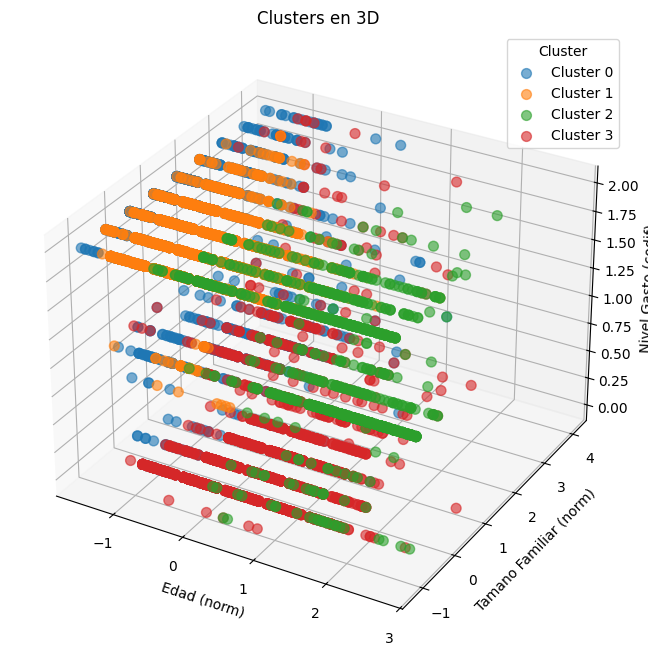

In [21]:
# Grafico 3D: Edad, Familia y Gasto
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(4):
    cluster_data = X[X['Cluster'] == i]
    ax.scatter(cluster_data['Age'], 
               cluster_data['Family_Size'], 
               cluster_data['Spending_Score_encoded'],
               c=colors[i], label=f'Cluster {i}', s=50, alpha=0.6)

ax.set_title('Clusters en 3D')
ax.set_xlabel('Edad (norm)')
ax.set_ylabel('Tamano Familiar (norm)')
ax.set_zlabel('Nivel Gasto (codif)')
ax.legend(title='Cluster')
plt.show()

In [22]:
# Perfil promedio de cada cluster
print('Perfil promedio por cluster:')
cluster_profile = X.drop('Cluster', axis=1).groupby(X['Cluster']).mean().round(2)
display(cluster_profile)

Perfil promedio por cluster:


,Gender_encoded,Ever_Married_encoded,Graduated_encoded,Profession_encoded,Spending_Score_encoded,Var_1_encoded,Age,Family_Size,Work_Experience_log,Age_bin_encoded,Gasto_por_miembro
Cluster,,,,,,,,,,,
0,0.60,0.33,0.42,4.82,1.68,3.77,-0.76,0.49,0.08,0.63,-0.05
1,0.48,0.39,0.71,0.87,1.99,4.26,-0.17,-0.47,0.11,1.04,0.85
2,0.59,0.90,0.61,6.41,1.40,4.63,1.61,-0.50,-0.34,2.78,0.29
3,0.55,0.99,0.77,0.78,0.20,4.23,0.33,0.21,-0.07,1.66,-1.11


In [23]:
# Interpretacion de clusters
print('Interpretacion de cada cluster:')

for idx in range(4):
    print(f'\n--- CLUSTER {idx} ---')
    print(f'Clientes: {cluster_counts[idx]} ({(cluster_counts[idx]/len(X)*100):.1f}%)')
    
    row = cluster_profile.loc[idx]
    
    # Interpretacion simple
    gender_pct = row['Gender_encoded']
    married_pct = row['Ever_Married_encoded']
    grad_pct = row['Graduated_encoded']
    
    print(f'Genero: {"Mas masculino" if gender_pct > 0.5 else "Mas femenino"}')
    print(f'Estado civil: {"Mas casados" if married_pct > 0.5 else "Mas solteros"}')
    print(f'Educacion: {"Mas graduados" if grad_pct > 0.5 else "Menos graduados"}')
    print(f'Edad normalizada: {row["Age"]:.2f}')
    print(f'Tamano familiar: {row["Family_Size"]:.2f}')
    print(f'Nivel gasto: {row["Spending_Score_encoded"]:.2f}')

Interpretacion de cada cluster:

--- CLUSTER 0 ---
Clientes: 2483 (30.8%)
Genero: Mas masculino
Estado civil: Mas solteros
Educacion: Menos graduados
Edad normalizada: -0.76
Tamano familiar: 0.49
Nivel gasto: 1.68

--- CLUSTER 1 ---
Clientes: 2506 (31.1%)
Genero: Mas femenino
Estado civil: Mas solteros
Educacion: Mas graduados
Edad normalizada: -0.17
Tamano familiar: -0.47
Nivel gasto: 1.99

--- CLUSTER 2 ---
Clientes: 1001 (12.4%)
Genero: Mas masculino
Estado civil: Mas casados
Educacion: Mas graduados
Edad normalizada: 1.61
Tamano familiar: -0.50
Nivel gasto: 1.40

--- CLUSTER 3 ---
Clientes: 2078 (25.8%)
Genero: Mas masculino
Estado civil: Mas casados
Educacion: Mas graduados
Edad normalizada: 0.33
Tamano familiar: 0.21
Nivel gasto: 0.20


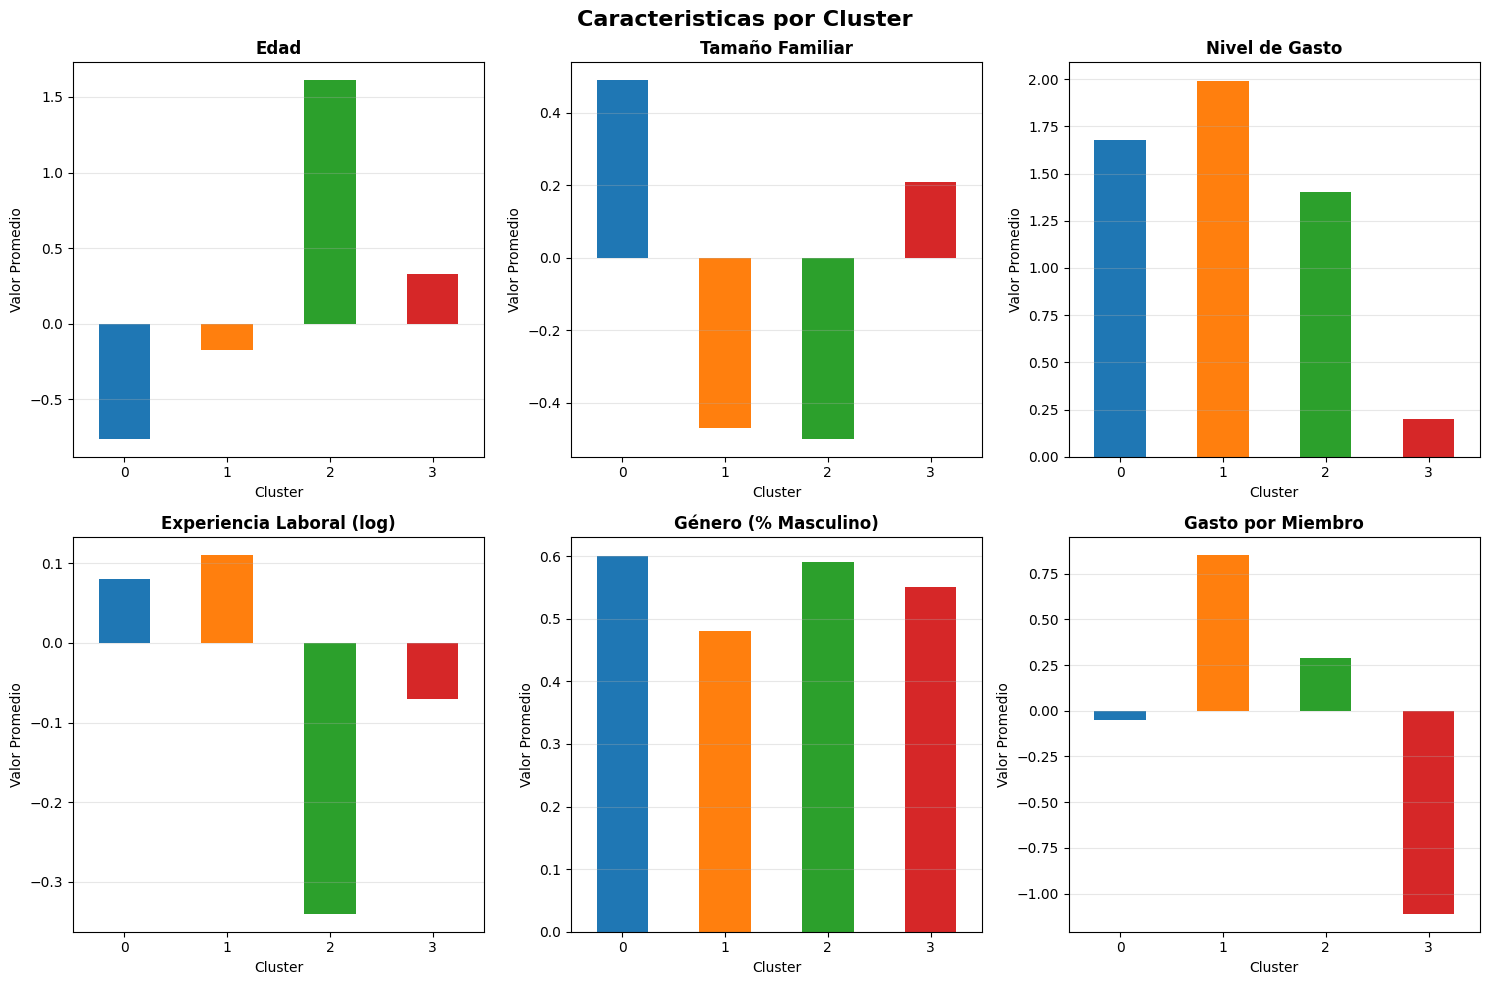


Visualización completada.


In [24]:

#==============================================================================
# 5. Grafico de barras comparativo por clusters
#==============================================================================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Caracteristicas por Cluster', fontsize=16, fontweight='bold')

# Variables a comparar
vars_to_plot = ['Age', 'Family_Size', 'Spending_Score_encoded', 
                'Work_Experience_log', 'Gender_encoded', 'Gasto_por_miembro']
titles = ['Edad', 'Tamaño Familiar', 'Nivel de Gasto', 
          'Experiencia Laboral (log)', 'Género (% Masculino)', 'Gasto por Miembro']

for idx, (var, title) in enumerate(zip(vars_to_plot, titles)):
    ax = axes[idx // 3, idx % 3]
    cluster_profile[var].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=10)
    ax.set_ylabel('Valor Promedio', fontsize=10)
    ax.set_xticklabels(range(4), rotation=0)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('\nVisualización completada.')

# 4. Evaluación del modelo
Métricas de eficiencia para clustering:
- Inercia (WCSS): mide la compacidad de los clusters
- Lee sobre Silhouette Score: qué tan similares son los objetos a su propio cluster en comparación con otros
- `from sklearn.metrics import silhouette_score score = silhouette_score(X_scaled, clusters)`
- Tiempo de ejecución
- Número de iteraciones hasta la convergencia
- Análisis de estabilidad: repetir K-Means con diferentes inicializaciones y verificar consistencia

In [25]:
# Evaluación del modelo
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import time

print('=== EVALUACIÓN DEL MODELO K-MEANS ===')
print('\nCalculando métricas de calidad del clustering...\n')

#==============================================================================
# 1. Inercia (WCSS) - Within-Cluster Sum of Squares
#==============================================================================
inercia = kmeans_final.inertia_
print(f'1. INERCIA (WCSS): {inercia:.2f}')


=== EVALUACIÓN DEL MODELO K-MEANS ===

Calculando métricas de calidad del clustering...

1. INERCIA (WCSS): 61906.30


In [26]:

#==============================================================================
# 2. Silhouette Score
#==============================================================================
X_sin_cluster = X.drop('Cluster', axis=1)
silhouette_avg = silhouette_score(X_sin_cluster, clusters)
print(f'2. SILHOUETTE SCORE: {silhouette_avg:.4f}')
if silhouette_avg > 0.5:
    print('Excelente estructura de clusters')
elif silhouette_avg > 0.3:
    print('Estructura razonable de clusters')
else:
    print('Estructura débil de clusters')
print()


2. SILHOUETTE SCORE: 0.2283
Estructura débil de clusters



In [27]:

#==============================================================================
# 3. Tiempo de ejecución
#==============================================================================
print(f'3. ANÁLISIS DE TIEMPO DE EJECUCIÓN:')
print(f'   Midiendo tiempo de ejecución con diferentes inicializaciones...\n')

tiempos = []
for i in range(5):
    start_time = time.time()
    kmeans_test = KMeans(n_clusters=4, random_state=i, n_init=10)
    kmeans_test.fit(X_sin_cluster)
    end_time = time.time()
    tiempo = end_time - start_time
    tiempos.append(tiempo)
    print(f'   Ejecución {i+1}: {tiempo:.4f} segundos')

tiempo_promedio = sum(tiempos) / len(tiempos)
print(f'\n   • Tiempo promedio: {tiempo_promedio:.4f} segundos')
print(f'   • Tiempo mínimo: {min(tiempos):.4f} segundos')
print(f'   • Tiempo máximo: {max(tiempos):.4f} segundos\n')


3. ANÁLISIS DE TIEMPO DE EJECUCIÓN:
   Midiendo tiempo de ejecución con diferentes inicializaciones...

   Ejecución 1: 0.0557 segundos
   Ejecución 2: 0.0482 segundos
   Ejecución 3: 0.0538 segundos
   Ejecución 4: 0.0552 segundos
   Ejecución 5: 0.0515 segundos

   • Tiempo promedio: 0.0529 segundos
   • Tiempo mínimo: 0.0482 segundos
   • Tiempo máximo: 0.0557 segundos

   Ejecución 4: 0.0552 segundos
   Ejecución 5: 0.0515 segundos

   • Tiempo promedio: 0.0529 segundos
   • Tiempo mínimo: 0.0482 segundos
   • Tiempo máximo: 0.0557 segundos



In [28]:

#==============================================================================
# 4. Analisis de estabilidad
#==============================================================================
print(f'4. ANALISIS DE ESTABILIDAD:')
print(f'   Comparando resultados con diferentes inicializaciones...\n')

silhouette_scores = []
inertias = []

for i in range(10):
    kmeans_stability = KMeans(n_clusters=4, random_state=i, n_init=10)
    clusters_stability = kmeans_stability.fit_predict(X_sin_cluster)
    
    sil_score = silhouette_score(X_sin_cluster, clusters_stability)
    silhouette_scores.append(sil_score)
    inertias.append(kmeans_stability.inertia_)

print(f'   Silhouette Score:')
print(f'   Promedio: {sum(silhouette_scores)/len(silhouette_scores):.4f}')
print(f'   Desviación estándar: {np.std(silhouette_scores):.4f}')
print(f'   Rango: [{min(silhouette_scores):.4f}, {max(silhouette_scores):.4f}]\n')

print(f'   Inercia (WCSS):')
print(f'   Promedio: {sum(inertias)/len(inertias):.2f}')
print(f'   Desviación estándar: {np.std(inertias):.2f}')
print(f'   Rango: [{min(inertias):.2f}, {max(inertias):.2f}]\n')

print(f'   Conclusión: El modelo es {"ESTABLE" if np.std(silhouette_scores) < 0.01 else "VARIABLE"} ', 'a diferentes inicializaciones.\n')


4. ANALISIS DE ESTABILIDAD:
   Comparando resultados con diferentes inicializaciones...

   Silhouette Score:
   Promedio: 0.2284
   Desviación estándar: 0.0000
   Rango: [0.2284, 0.2284]

   Inercia (WCSS):
   Promedio: 61906.19
   Desviación estándar: 0.02
   Rango: [61906.18, 61906.24]

   Conclusión: El modelo es ESTABLE  a diferentes inicializaciones.

   Silhouette Score:
   Promedio: 0.2284
   Desviación estándar: 0.0000
   Rango: [0.2284, 0.2284]

   Inercia (WCSS):
   Promedio: 61906.19
   Desviación estándar: 0.02
   Rango: [61906.18, 61906.24]

   Conclusión: El modelo es ESTABLE  a diferentes inicializaciones.



# 5. Prediccion de Nuevos Clientes (Test Set)
Ahora aplicaremos el modelo entrenado para predecir los segmentos de los 2627 nuevos clientes del conjunto Test.

El objetivo principal del proyecto es clasificar estos nuevos clientes en los 4 segmentos (A, B, C, D) usando el mismo pipeline de procesamiento.

In [29]:
# Funcion para procesar datos (train o test)
def procesar_datos(df, encoders=None, scaler=None, is_test=False):
    """
    Aplica el mismo preprocessing a los datos
    df: DataFrame a procesar
    encoders: diccionario con encoders ya entrenados (para test)
    scaler: StandardScaler ya entrenado (para test)
    is_test: True si es el conjunto de test
    """
    processed_df = df.copy()

    # Rellenar valores nulos (mismo criterio que train)
    processed_df['Age'] = processed_df['Age'].fillna(processed_df['Age'].median())
    processed_df['Family_Size'] = processed_df['Family_Size'].fillna(processed_df['Family_Size'].median())
    processed_df['Work_Experience'] = processed_df['Work_Experience'].fillna(0)
    processed_df['Spending_Score'] = processed_df['Spending_Score'].fillna('Low')
    processed_df['Gender'] = processed_df['Gender'].fillna(processed_df['Gender'].mode()[0])
    processed_df['Profession'] = processed_df['Profession'].fillna(processed_df['Profession'].mode()[0])
    processed_df['Ever_Married'] = processed_df['Ever_Married'].fillna(processed_df['Ever_Married'].mode()[0])
    processed_df['Graduated'] = processed_df['Graduated'].fillna(processed_df['Graduated'].mode()[0])
    processed_df['Var_1'] = processed_df['Var_1'].fillna(processed_df['Var_1'].mode()[0])
    
    if is_test:
        # Usar encoders ya entrenados
        processed_df['Gender_encoded'] = encoders['gender'].transform(processed_df['Gender'])
        processed_df['Profession_encoded'] = encoders['profession'].transform(processed_df['Profession'])
        processed_df['Spending_Score_encoded'] = encoders['spending'].transform(processed_df['Spending_Score'])
        processed_df['Ever_Married_encoded'] = encoders['married'].transform(processed_df['Ever_Married'])
        processed_df['Graduated_encoded'] = encoders['graduated'].transform(processed_df['Graduated'])
        processed_df['Var_1_encoded'] = encoders['var1'].transform(processed_df['Var_1'])
    else:
        # Entrenar nuevos encoders
        encoders = {}
        encoders['gender'] = LabelEncoder().fit(processed_df['Gender'])
        encoders['profession'] = LabelEncoder().fit(processed_df['Profession'])
        encoders['spending'] = LabelEncoder().fit(processed_df['Spending_Score'])
        encoders['married'] = LabelEncoder().fit(processed_df['Ever_Married'])
        encoders['graduated'] = LabelEncoder().fit(processed_df['Graduated'])
        encoders['var1'] = LabelEncoder().fit(processed_df['Var_1'])
        
        processed_df['Gender_encoded'] = encoders['gender'].transform(processed_df['Gender'])
        processed_df['Profession_encoded'] = encoders['profession'].transform(processed_df['Profession'])
        processed_df['Spending_Score_encoded'] = encoders['spending'].transform(processed_df['Spending_Score'])
        processed_df['Ever_Married_encoded'] = encoders['married'].transform(processed_df['Ever_Married'])
        processed_df['Graduated_encoded'] = encoders['graduated'].transform(processed_df['Graduated'])
        processed_df['Var_1_encoded'] = encoders['var1'].transform(processed_df['Var_1'])
    
    # Binning de edad
    processed_df['Age_bin'] = pd.cut(processed_df['Age'],
                                     bins=[0, 25, 40, 60, 100],
                                     labels=['Joven', 'Adulto', 'Maduro', 'Mayor'])
    processed_df['Age_bin'] = processed_df['Age_bin'].fillna('Adulto')
    
    if is_test:
        processed_df['Age_bin_encoded'] = encoders['age_bin'].transform(processed_df['Age_bin'].astype(str))
    else:
        encoders['age_bin'] = LabelEncoder().fit(processed_df['Age_bin'].astype(str))
        processed_df['Age_bin_encoded'] = encoders['age_bin'].transform(processed_df['Age_bin'].astype(str))
    
    # Transformacion logaritmica
    processed_df['Work_Experience_log'] = np.log1p(processed_df['Work_Experience'])
    
    # Variable agregada
    processed_df['Gasto_por_miembro'] = processed_df['Spending_Score_encoded'] / (processed_df['Family_Size'] + 1)
    
    # Normalizacion
    num_vars = ['Age', 'Family_Size', 'Work_Experience_log', 'Gasto_por_miembro']
    if is_test:
        processed_df[num_vars] = scaler.transform(processed_df[num_vars])
    else:
        scaler = StandardScaler().fit(processed_df[num_vars])
        processed_df[num_vars] = scaler.transform(processed_df[num_vars])
    
    # Seleccionar caracteristicas finales
    features = [
        'Gender_encoded', 'Ever_Married_encoded', 'Graduated_encoded',
        'Profession_encoded', 'Spending_Score_encoded', 'Var_1_encoded',
        'Age', 'Family_Size', 'Work_Experience_log', 'Age_bin_encoded', 'Gasto_por_miembro'
    ]
    
    X_processed = processed_df[features].copy()
    
    return X_processed, encoders, scaler

print('Funcion de preprocessing creada.')

Funcion de preprocessing creada.


In [30]:
# Crear diccionario de encoders ya entrenados
encoders_trained = {
    'gender': gender_encoder,
    'profession': profession_encoder,
    'spending': spending_encoder,
    'married': married_encoder,
    'graduated': graduated_encoder,
    'var1': var1_encoder,
    'age_bin': age_bin_encoder
}

print('Encoders preparados para aplicar al test set.')

Encoders preparados para aplicar al test set.


In [31]:
# Procesar conjunto Test usando el mismo pipeline
print('Procesando conjunto Test...')
print('Test original:')
display(test_df.head(5))
#print(f'Test original: {test_df.shape[0]} clientes')

X_test, _, _ = procesar_datos(test_df, encoders=encoders_trained, scaler=scaler, is_test=True)

print(f'Test procesado: {X_test.shape[0]} filas, {X_test.shape[1]} caracteristicas')
print('Primeras filas del test procesado:')
display(X_test.head())

Procesando conjunto Test...
Test original:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


Test procesado: 2627 filas, 11 caracteristicas
Primeras filas del test procesado:


,Gender_encoded,Ever_Married_encoded,Graduated_encoded,Profession_encoded,Spending_Score_encoded,Var_1_encoded,Age,Family_Size,Work_Experience_log,Age_bin_encoded,Gasto_por_miembro
0,0,1,1,2,2,5,-0.446835,-1.237990,-0.961197,0,1.677316
1,1,1,1,5,0,5,-0.386993,0.762698,1.626343,0,-1.254438
2,0,1,0,0,2,5,1.527952,-1.237990,-0.961197,3,1.677316
3,1,1,0,4,1,5,0.929532,-0.571094,1.965129,2,-0.277186
4,0,0,0,8,2,5,-1.464150,0.762698,-0.961197,1,-0.081736


In [32]:
# Predecir segmentos para nuevos clientes
print('Prediciendo segmentos para nuevos clientes...')

# Usar el modelo ya entrenado para predecir
test_clusters = kmeans_final.predict(X_test)

print(f'Predicciones completadas para {len(test_clusters)} clientes')
print('Distribucion de predicciones:')

# Mostrar distribucion de clusters predichos
test_cluster_counts = pd.Series(test_clusters).value_counts().sort_index()
for cluster_id, count in test_cluster_counts.items():
    percentage = (count / len(test_clusters)) * 100
    print(f'Cluster {cluster_id}: {count} clientes ({percentage:.1f}%)')

Prediciendo segmentos para nuevos clientes...
Predicciones completadas para 2627 clientes
Distribucion de predicciones:
Cluster 0: 769 clientes (29.3%)
Cluster 1: 838 clientes (31.9%)
Cluster 2: 350 clientes (13.3%)
Cluster 3: 670 clientes (25.5%)


In [33]:
# Crear archivo de resultados con predicciones
resultados = pd.DataFrame({
    'ID': test_df['ID'],
    'Predicted_Segment': test_clusters
})

# Mapear numeros de cluster a letras (0->A, 1->B, 2->C, 3->D)
segment_map = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}
resultados['Predicted_Segment_Letter'] = resultados['Predicted_Segment'].map(segment_map)

print('Primeras 10 predicciones:')
display(resultados.head(10))

# Guardar resultados en CSV
#resultados.to_csv('predicciones_segmentos_clientes.csv', index=False)
#print(f'Archivo guardado: predicciones_segmentos_clientes.csv')
print(f'Total de predicciones: {len(resultados)}')

Primeras 10 predicciones:


,ID,Predicted_Segment,Predicted_Segment_Letter
0,458989,1,B
1,458994,0,A
2,458996,1,B
3,459000,0,A
4,459001,0,A
5,459003,3,D
6,459005,1,B
7,459008,3,D
8,459013,3,D
9,459014,0,A


Total de predicciones: 2627


Comparacion de distribuciones:

Train (datos historicos):
Cluster 0: 30.8%
Cluster 1: 31.1%
Cluster 2: 12.4%
Cluster 3: 25.8%

Test (nuevos clientes predichos):
Cluster 0: 29.3%
Cluster 1: 31.9%
Cluster 2: 13.3%
Cluster 3: 25.5%


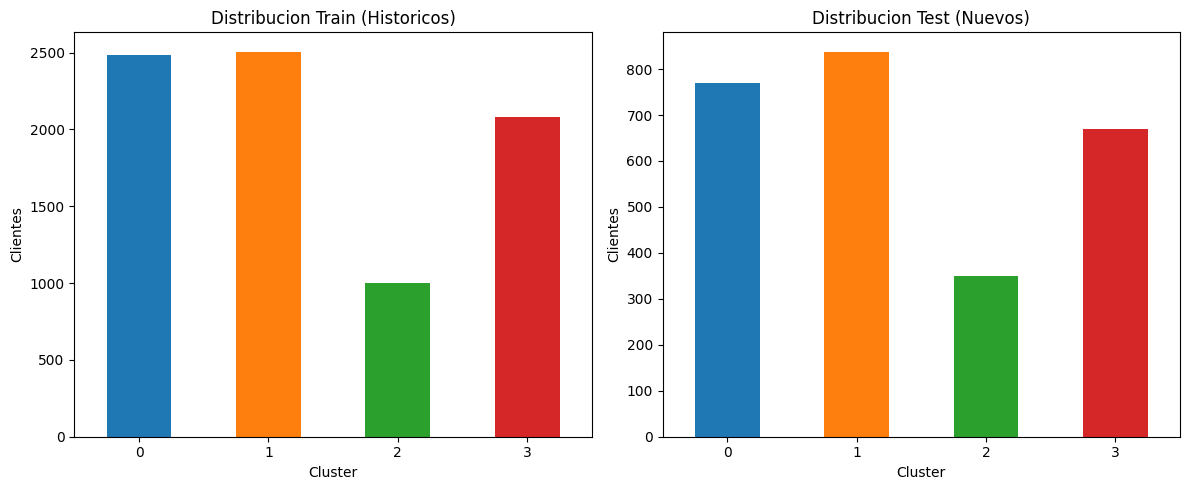

In [34]:
# Comparar distribucion entre Train y Test
print('Comparacion de distribuciones:')
print('\nTrain (datos historicos):')
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(X)) * 100
    print(f'Cluster {cluster_id}: {percentage:.1f}%')

print('\nTest (nuevos clientes predichos):')
for cluster_id, count in test_cluster_counts.items():
    percentage = (count / len(test_clusters)) * 100
    print(f'Cluster {cluster_id}: {percentage:.1f}%')

# Grafico comparativo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Train
cluster_counts.plot(kind='bar', ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax1.set_title('Distribucion Train (Historicos)')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Clientes')
ax1.tick_params(axis='x', rotation=0)

# Test
test_cluster_counts.plot(kind='bar', ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
ax2.set_title('Distribucion Test (Nuevos)')
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Clientes')
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# 6. Resumen Final del Modelo
Tabla consolidada con todas las metricas y resultados del proyecto.

In [35]:
# Tabla resumen con todas las metricas del modelo
resumen_modelo = pd.DataFrame({
    'Metrica': [
        'Algoritmo',
        'Numero de clusters (K)',
        'Numero de caracteristicas',
        'Clientes entrenamiento',
        'Clientes predichos (test)',
        'Inercia (WCSS)',
        'Silhouette Score',
        'Iteraciones convergencia',
        'Tiempo promedio ejecucion (seg)',
        'Estabilidad modelo'
    ],
    'Valor': [
        'K-Means',
        optimal_k,
        len(features_finales),
        len(X),
        len(test_clusters),
        f'{kmeans_final.inertia_:.2f}',
        f'{silhouette_avg:.4f}',
        kmeans_final.n_iter_,
        f'{tiempo_promedio:.4f}',
        'ESTABLE' if np.std(silhouette_scores) < 0.01 else 'VARIABLE'
    ]
})

print('RESUMEN COMPLETO DEL MODELO K-MEANS')
print('='*50)
display(resumen_modelo)

print('\nDISTRIBUCION FINAL DE SEGMENTOS:')
print('Train (historicos):')
for i, (cluster_id, count) in enumerate(cluster_counts.items()):
    pct = (count / len(X)) * 100
    print(f'  Segmento {chr(65+i)} (Cluster {cluster_id}): {count} clientes ({pct:.1f}%)')

print('\nTest (nuevos predichos):')
for i, (cluster_id, count) in enumerate(test_cluster_counts.items()):
    pct = (count / len(test_clusters)) * 100
    print(f'  Segmento {chr(65+i)} (Cluster {cluster_id}): {count} clientes ({pct:.1f}%)')

RESUMEN COMPLETO DEL MODELO K-MEANS


,Metrica,Valor
0,Algoritmo,K-Means
1,Numero de clusters (K),4
2,Numero de caracteristicas,11
3,Clientes entrenamiento,8068
4,Clientes predichos (test),2627
5,Inercia (WCSS),61906.30
6,Silhouette Score,0.2283
7,Iteraciones convergencia,16
8,Tiempo promedio ejecucion (seg),0.0529
9,Estabilidad modelo,ESTABLE



DISTRIBUCION FINAL DE SEGMENTOS:
Train (historicos):
  Segmento A (Cluster 0): 2483 clientes (30.8%)
  Segmento B (Cluster 1): 2506 clientes (31.1%)
  Segmento C (Cluster 2): 1001 clientes (12.4%)
  Segmento D (Cluster 3): 2078 clientes (25.8%)

Test (nuevos predichos):
  Segmento A (Cluster 0): 769 clientes (29.3%)
  Segmento B (Cluster 1): 838 clientes (31.9%)
  Segmento C (Cluster 2): 350 clientes (13.3%)
  Segmento D (Cluster 3): 670 clientes (25.5%)
